## Installing Packages

In [1]:
!pip install numpy nibabel scipy scikit-image matplotlib

In [2]:
!pip install freesurfer-surface

In [3]:
!pip install numpy-stl

In [4]:
!pip install mayavi

In [5]:
!pip install PyQt5

In [6]:
!pip install ipywidgets

In [7]:
!pip install ipyevents

In [8]:
!jupyter nbextension install --py mayavi --user

Installing C:\ProgramData\anaconda3\lib\site-packages\mayavi\tools/static -> mayavi
Up to date: C:\Users\Administrator\AppData\Roaming\jupyter\nbextensions\mayavi\x3d\LICENSE.txt
Up to date: C:\Users\Administrator\AppData\Roaming\jupyter\nbextensions\mayavi\x3d\x3dom.css
Up to date: C:\Users\Administrator\AppData\Roaming\jupyter\nbextensions\mayavi\x3d\x3dom.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable mayavi --user --py
    


In [9]:
!jupyter nbextension enable --py mayavi --user

Enabling notebook extension mayavi/x3d/x3dom...
      - Validating: ok


## Importing Packages

In [10]:
import numpy as np
import nibabel as nib
from scipy.ndimage import binary_dilation, binary_fill_holes, binary_erosion
from skimage.measure import marching_cubes
from stl import mesh
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [11]:
def fill_sulci(volume):
    # Dilate the volume
    dilated = binary_dilation(volume)

    # Fill holes in the volume
    filled = binary_fill_holes(dilated)

    # Erode the volume
    eroded = binary_erosion(filled)

    return eroded

## Defining Variables

In [12]:
import os
from skimage import morphology

INPUT_SURFACE = "exvivo/mesh_1.surf"
# ANNOT = 'invivo/mesh_1.annot'
FILL = True
OUTPUT_FILLED_SURFACE = "outsurfs/exvivo_filled.mgz"
OUTPUT_CLOSED_SURFACE = "outsurfs/exvivo_closed.mgz"
RADIUS = 5

In [13]:
# Load surface mesh using nibabel freesurfer read_geometry
vertices, faces = nib.freesurfer.read_geometry(INPUT_SURFACE)

In [14]:
vertices.shape,faces.shape

((1025656, 3), (2051316, 3))

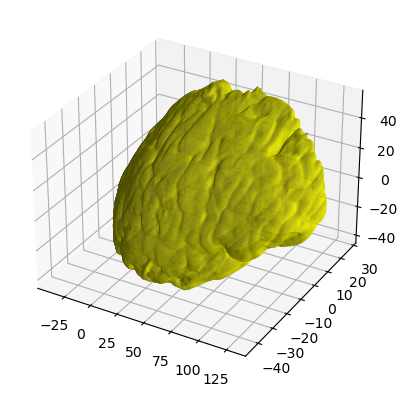

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(vertices[:, 1], vertices[:, 0], faces, vertices[:, 2],color='yellow', shade=True)
cmap = plt.get_cmap('hot')
plt.set_cmap(cmap)
plt.show()

In [16]:
from mayavi import mlab

mlab.triangular_mesh(vertices[:, 0], vertices[:, 1], vertices[:, 2], faces)
mlab.show()

## Filling Meshes

In [17]:
# Filling in mesh at high resolution
if FILL:
    print("Filling in mesh at high resolution")
    os.system(f"mris_fill -r 0.2 {INPUT_SURFACE} {OUTPUT_FILLED_SURFACE}")

Filling in mesh at high resolution


In [18]:
invivo_filled_res_3 = "exvivo_filled/03/filled_mesh_1.mgz"
invivo_filled_res_4 = "exvivo_filled/04/filled_mesh_1.mgz"
invivo_filled_res_5 = "exvivo_filled/05/filled_mesh_1.mgz"

In [19]:
# Closing deep suci
print("Closing deep sulci")

## Read MRI data
mri3 = nib.load(invivo_filled_res_3)
mri4 = nib.load(invivo_filled_res_4)
mri5 = nib.load(invivo_filled_res_5)

Closing deep sulci


In [20]:
pad=10
data3 = np.zeros(np.asarray(mri3.get_fdata().shape) +2*pad)
data3[pad:-pad, pad:-pad, pad:-pad] = mri3.get_fdata()>0.5
max_slices = data3.shape[1] - 1

In [21]:
pad=10
data4 = np.zeros(np.asarray(mri4.get_fdata().shape) +2*pad)
data4[pad:-pad, pad:-pad, pad:-pad] = mri4.get_fdata()>0.5
max_slices = data4.shape[1] - 1

In [22]:
pad=10
data5 = np.zeros(np.asarray(mri5.get_fdata().shape) +2*pad)
data5[pad:-pad, pad:-pad, pad:-pad] = mri5.get_fdata()>0.5
max_slices = data5.shape[1] - 1

Text(0.5, 1.0, 'Central Slice After Filling Res=5')

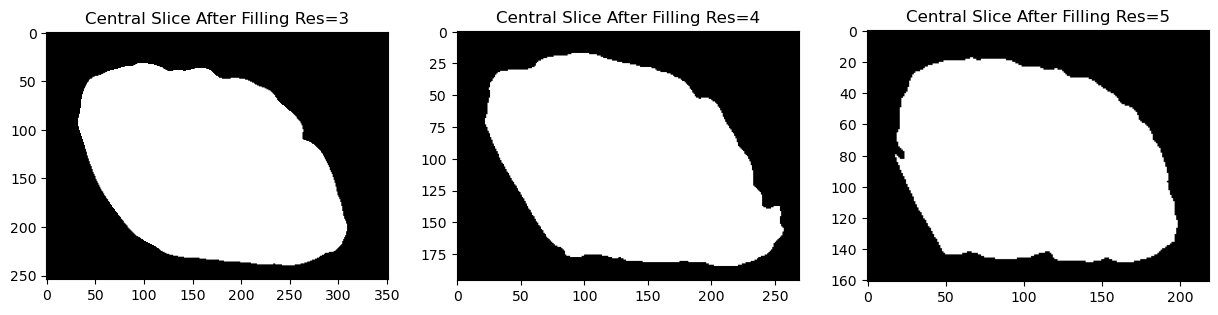

In [23]:
fig, axs = plt.subplots(1,3,figsize=(15, 15))

axs[0].imshow(data3[:,max_slices//2,:], cmap="gray", aspect='equal')
axs[0].set_title('Central Slice After Filling Res=3')
axs[1].imshow(data4[:,max_slices//2,:], cmap="gray", aspect='equal')
axs[1].set_title('Central Slice After Filling Res=4')
axs[2].imshow(data5[:,max_slices//2,:], cmap="gray", aspect='equal')
axs[2].set_title('Central Slice After Filling Res=5')


In [24]:
mri3.shape

(234, 561, 332)

In [25]:
mri4.shape

(176, 421, 249)

In [26]:
mri5.shape

(141, 337, 199)

<IPython.core.display.Javascript object>


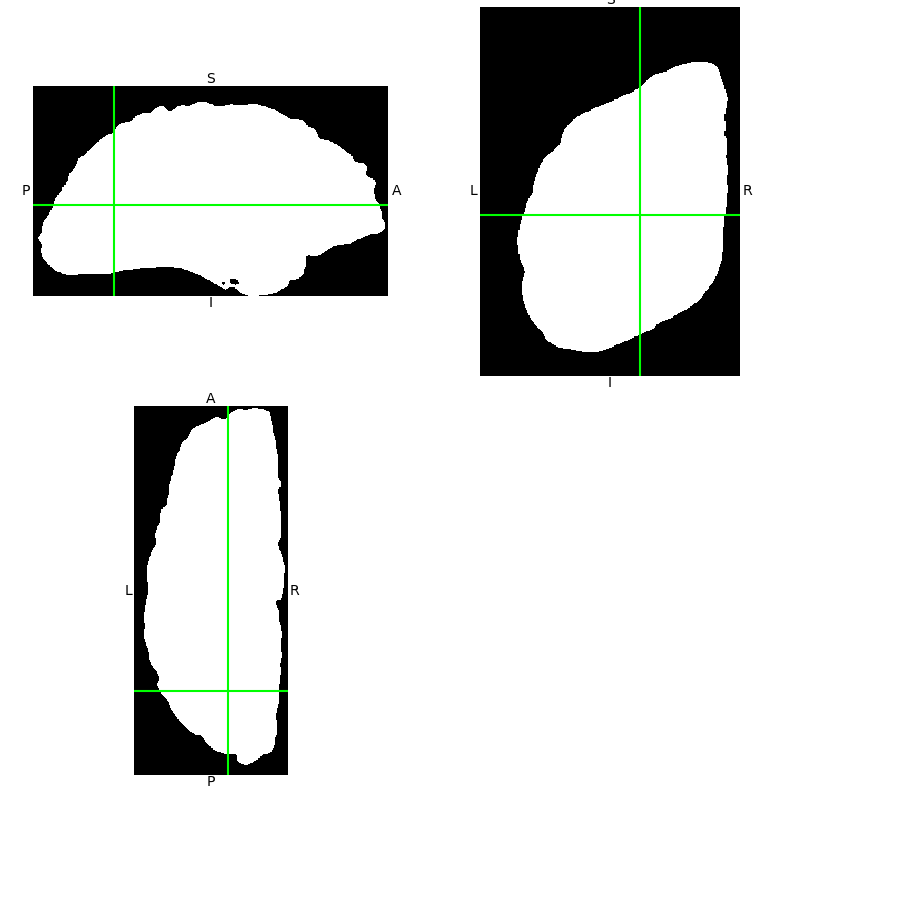

<OrthoSlicer3D: exvivo_filled/03/filled_mesh_1.mgz (234, 561, 332)>

In [27]:
%matplotlib notebook
mri3.orthoview()

<IPython.core.display.Javascript object>


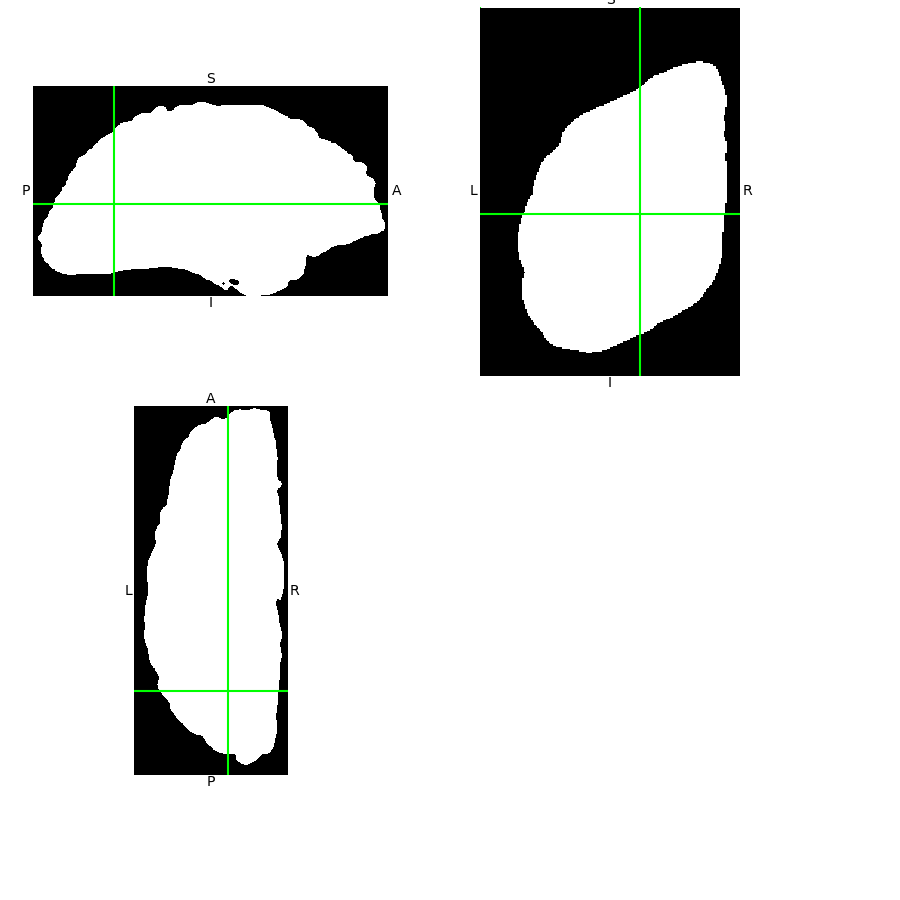

<OrthoSlicer3D: exvivo_filled/04/filled_mesh_1.mgz (176, 421, 249)>

In [28]:
mri4.orthoview()

<IPython.core.display.Javascript object>


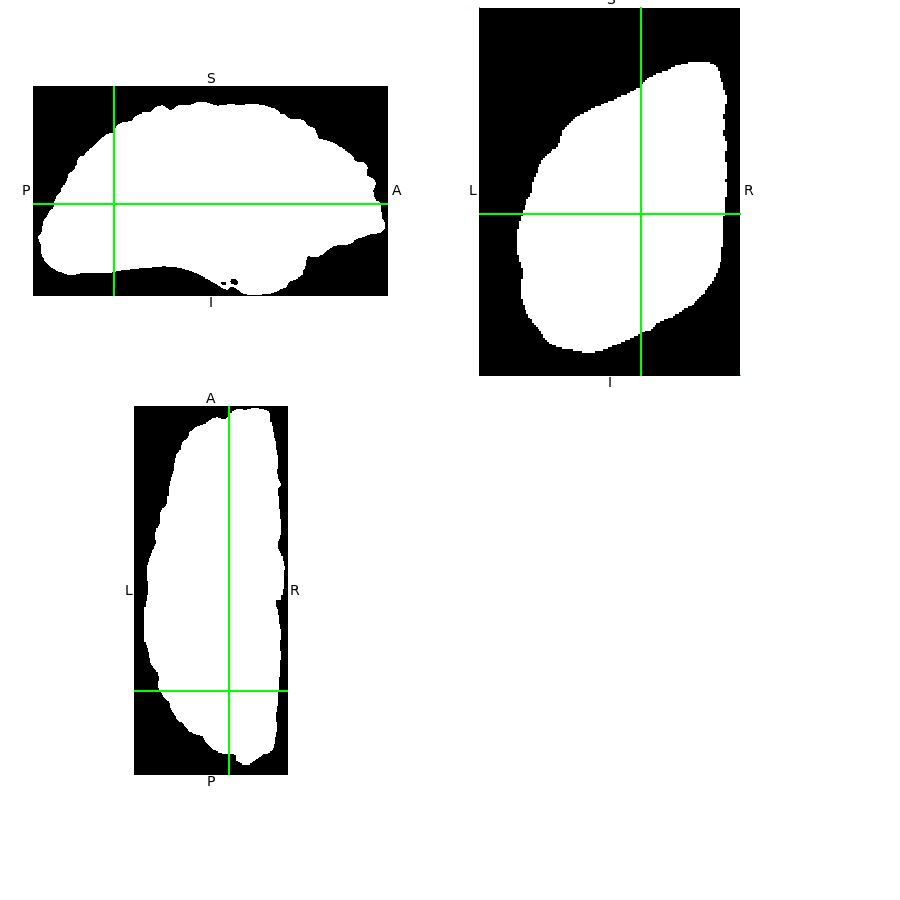

<OrthoSlicer3D: exvivo_filled/05/filled_mesh_1.mgz (141, 337, 199)>

In [29]:
mri5.orthoview()

## Closing Meshes

In [30]:
from scipy.ndimage import binary_dilation
from scipy.ndimage import binary_fill_holes
from scipy.ndimage import binary_erosion

In [31]:
volume_data_3 = nib.load(invivo_filled_res_3)
volume_data_4 = nib.load(invivo_filled_res_4)
volume_data_5 = nib.load(invivo_filled_res_5)

In [32]:
# Create data array
pad = 10
mask_data_3 = np.zeros(np.asarray(volume_data_3.get_fdata().shape) +2*pad)
mask_data_3[pad:-pad, pad:-pad, pad:-pad] = volume_data_3.get_fdata()>0.5
print(mask_data_3.shape)

(254, 581, 352)


In [33]:
mask_data_3 = morphology.closing(
    mask_data_3, 
    morphology.ball(1.75/0.3)
)

In [34]:
# Create data array
pad = 10
mask_data_4 = np.zeros(np.asarray(volume_data_4.get_fdata().shape) +2*pad)
mask_data_4[pad:-pad, pad:-pad, pad:-pad] = volume_data_4.get_fdata()>0.5
print(mask_data_4.shape)

(196, 441, 269)


In [35]:
mask_data_4 = morphology.closing(
    mask_data_4, 
    morphology.ball(1.75/0.4)
)

In [36]:
# Create data array
pad = 10
mask_data_5 = np.zeros(np.asarray(volume_data_5.get_fdata().shape) +2*pad)
mask_data_5[pad:-pad, pad:-pad, pad:-pad] = volume_data_5.get_fdata()>0.5
print(mask_data_5.shape)

(161, 357, 219)


In [37]:
mask_data_5 = morphology.closing(
    mask_data_5, 
    morphology.ball(1.75/0.5)
)

Text(0.5, 1.0, 'Central Slice After Closing Res=5')

<IPython.core.display.Javascript object>


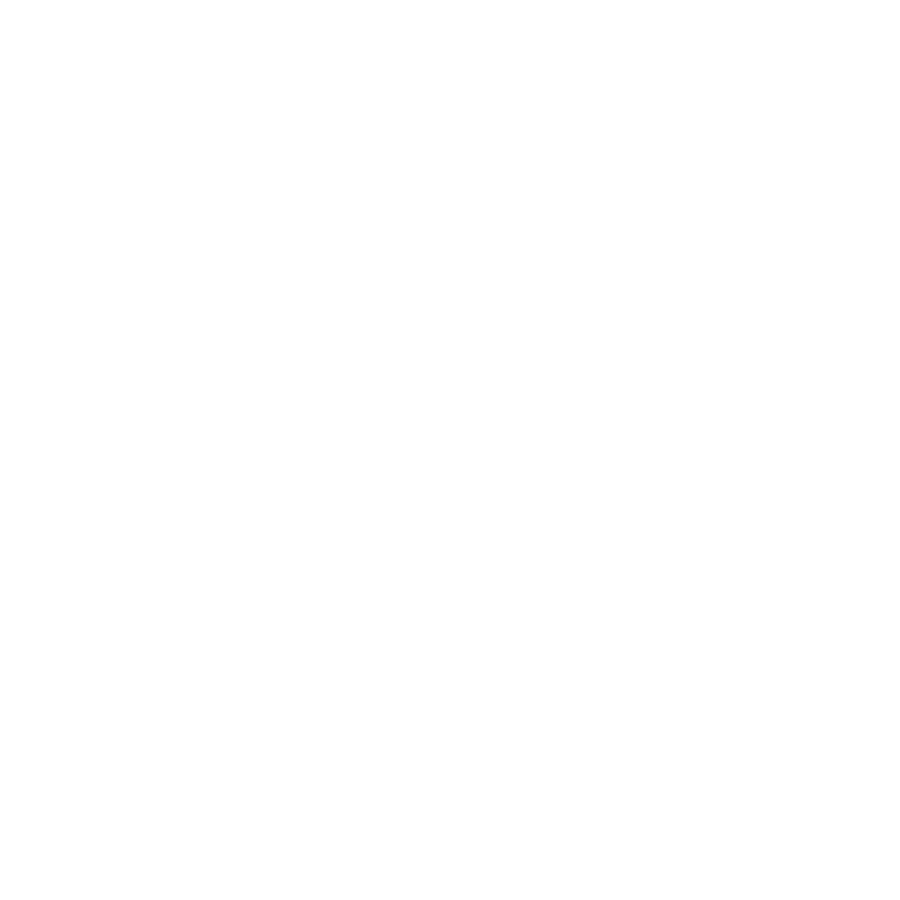

<IPython.core.display.Javascript object>


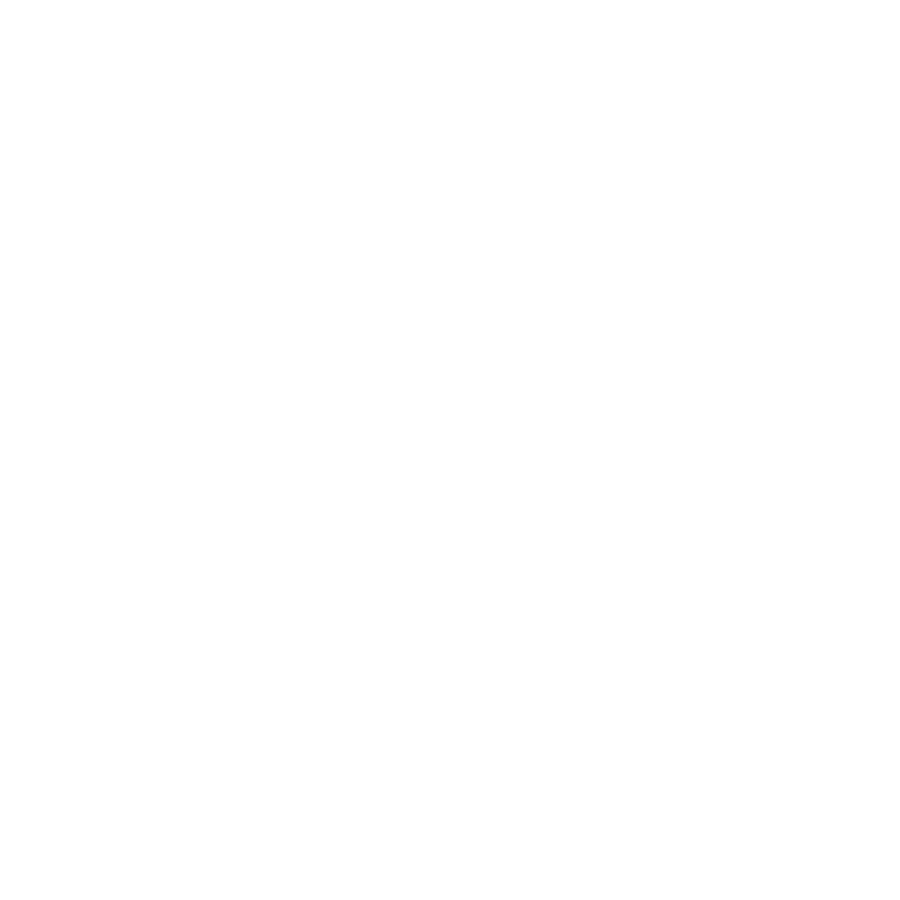

<IPython.core.display.Javascript object>


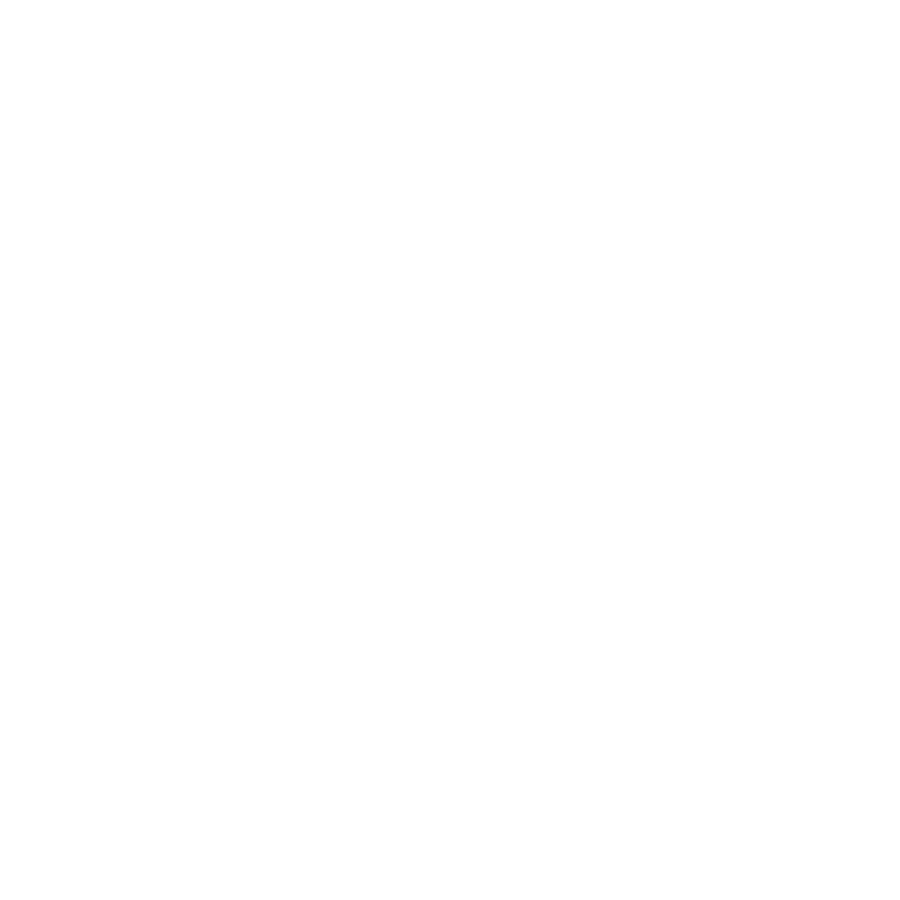

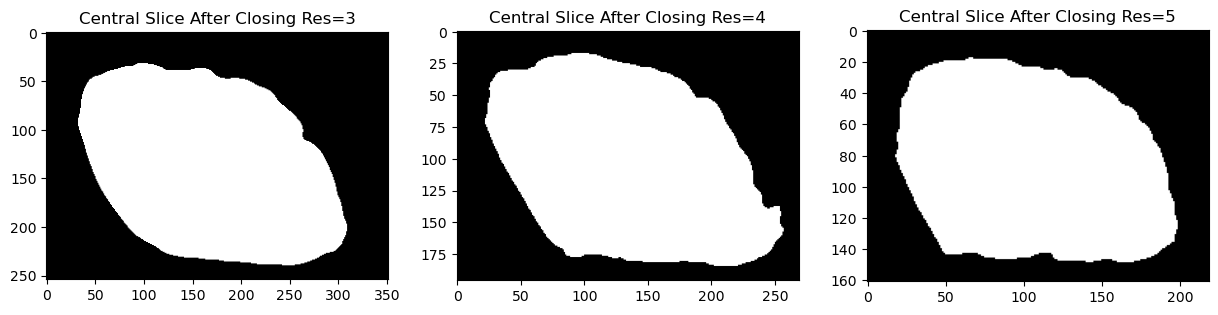

Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 304, in process
    func(*args, **kwargs)
TypeError: OrthoSlicer3D._cleanup() takes 1 positional argument but 2 were given
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 304, in process
    func(*args, **kwargs)
TypeError: OrthoSlicer3D._cleanup() takes 1 positional argument but 2 were given
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 304, in process
    func(*args, **kwargs)
TypeError: OrthoSlicer3D._cleanup() takes 1 positional argument but 2 were given
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 304, in process
    func(*args, **kwargs)
TypeError: OrthoSlicer3D._cleanup() takes 1 positional argument but 2 were given
Traceback (most rece

In [38]:
%matplotlib inline
fig, axs = plt.subplots(1, 3,figsize=(15, 15))

axs[0].imshow(mask_data_3[:,max_slices//2,:], cmap="gray", aspect='equal')
axs[0].set_title('Central Slice After Closing Res=3')
axs[1].imshow(mask_data_4[:,max_slices//2,:], cmap="gray", aspect='equal')
axs[1].set_title('Central Slice After Closing Res=4')
axs[2].imshow(mask_data_5[:,max_slices//2,:], cmap="gray", aspect='equal')
axs[2].set_title('Central Slice After Closing Res=5')


## Dilating, Binary Fill Holes, and Eroding

In [39]:
# mask_data_3 = np.zeros(volume_data_3.shape)
# mask_data_3[volume_data_3 > np.percentile(volume_data_3[volume_data_3 > 0], q=99)] = 1
print("Dilating")
mask_data_dilated_3 = morphology.dilation(mask_data_3, morphology.ball(1.75/0.3))

## Fill holes
print("Filling holes")
# data = morphology.flood_fill(mask_data_dilated_3)
mask_data_filled_3 = binary_fill_holes(mask_data_dilated_3)
## Erode
print("Eroding")
mask_data_eroded_3 = morphology.erosion(mask_data_filled_3, morphology.ball(1.75/0.3))

# mask_data_dilated_3 = binary_dilation(mask_data_3)
# mask_data_filled_3 = binary_fill_holes(mask_data_dilated_3)
# mask_data_eroded_3 = binary_erosion(mask_data_filled_3)

nib.save(nib.Nifti1Image(mask_data_eroded_3.astype(np.uint8), affine=np.eye(4)), 'outsurfs/exvivo_closed_3.nii.gz')

Dilating
Filling holes
Eroding


In [40]:
# mask_data_4 = np.zeros(volume_data_4.shape)
# mask_data_4[volume_data_4 > np.percentile(volume_data_4[volume_data_4 > 0], q=99)] = 1
print("Dilating")
mask_data_dilated_4 = morphology.dilation(mask_data_4, morphology.ball(1.75/0.4))

## Fill holes
print("Filling holes")
# mask_data_filled_4 = morphology.flood_fill(mask_data_dilated_4)
mask_data_filled_4 = binary_fill_holes(mask_data_dilated_4)

## Erode
print("Eroding")
mask_data_eroded_4 = morphology.erosion(mask_data_filled_4, morphology.ball(1.75/0.4))

# mask_data_dilated_4 = morph.binary_dilation(mask_data_4)
# mask_data_filled_4 = morph.binary_fill_holes(mask_data_dilated_4)
# mask_data_eroded_4 = morph.binary_erosion(mask_data_filled_4)

nib.save(nib.Nifti1Image(mask_data_eroded_4.astype(np.uint8), affine=np.eye(4)), 'outsurfs/exvivo_closed_4.nii.gz')

Dilating
Filling holes
Eroding


In [41]:
# mask_data_5 = np.zeros(volume_data_5.shape)
# mask_data_5[volume_data_5 > np.percentile(volume_data_5[volume_data_5 > 0], q=99)] = 1
# Operations
## Dilate
print("Dilating")
mask_data_dilated_5 = morphology.dilation(mask_data_5, morphology.ball(1.75/0.5))

## Fill holes
print("Filling holes")
# mask_data_filled_5 = morphology.flood_fill(mask_data_dilated_5)
mask_data_filled_5 = binary_fill_holes(mask_data_dilated_5)

## Erode
print("Eroding")
mask_data_eroded_5 = morphology.erosion(mask_data_filled_5, morphology.ball(1.75/0.5))

## Fill holes
# mask_data_dilated_5 = morph.binary_dilation(mask_data_5)
# mask_data_filled_5 = morph.binary_fill_holes(mask_data_dilated_5)
# mask_data_eroded_5 = morph.binary_erosion(mask_data_filled_5)

nib.save(nib.Nifti1Image(mask_data_eroded_5.astype(np.uint8), affine=np.eye(4)), 'outsurfs/exvivo_closed_5.nii.gz')

Dilating
Filling holes
Eroding


Text(0.5, 1.0, 'Central Slice After Dilation, Filling hole and Erosion Res=5')

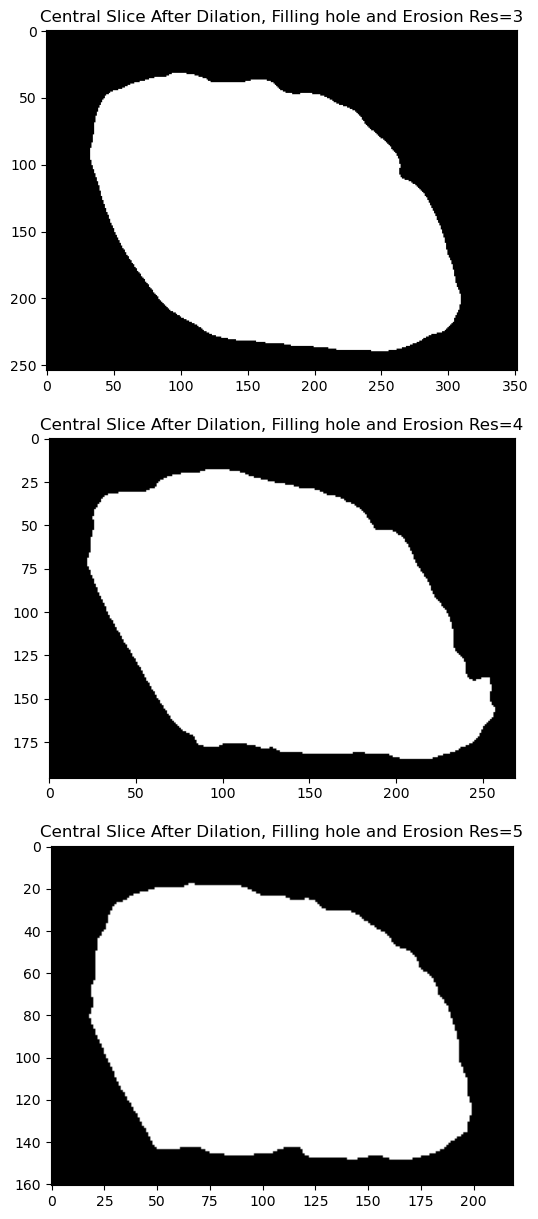

In [42]:
%matplotlib inline
fig, axs = plt.subplots(3, 1,figsize=(15, 15))

axs[0].imshow(mask_data_eroded_3[:,max_slices//2,:], cmap="gray", aspect='equal')
axs[0].set_title('Central Slice After Dilation, Filling hole and Erosion Res=3')
axs[1].imshow(mask_data_eroded_4[:,max_slices//2,:], cmap="gray", aspect='equal')
axs[1].set_title('Central Slice After Dilation, Filling hole and Erosion Res=4')
axs[2].imshow(mask_data_eroded_5[:,max_slices//2,:], cmap="gray", aspect='equal')
axs[2].set_title('Central Slice After Dilation, Filling hole and Erosion Res=5')

In [43]:
volume_data_3 = nib.load('outsurfs/exvivo_closed_3.nii.gz')
volume_data_4 = nib.load("outsurfs/exvivo_closed_4.nii.gz")
volume_data_5 = nib.load("outsurfs/exvivo_closed_5.nii.gz")

In [44]:
volume_data_3.shape

(254, 581, 352)

In [45]:
volume_data_4.shape

(196, 441, 269)

In [46]:
volume_data_5.shape

(161, 357, 219)

In [ ]:
%matplotlib notebook
volume_data_3.orthoview()

<IPython.core.display.Javascript object>


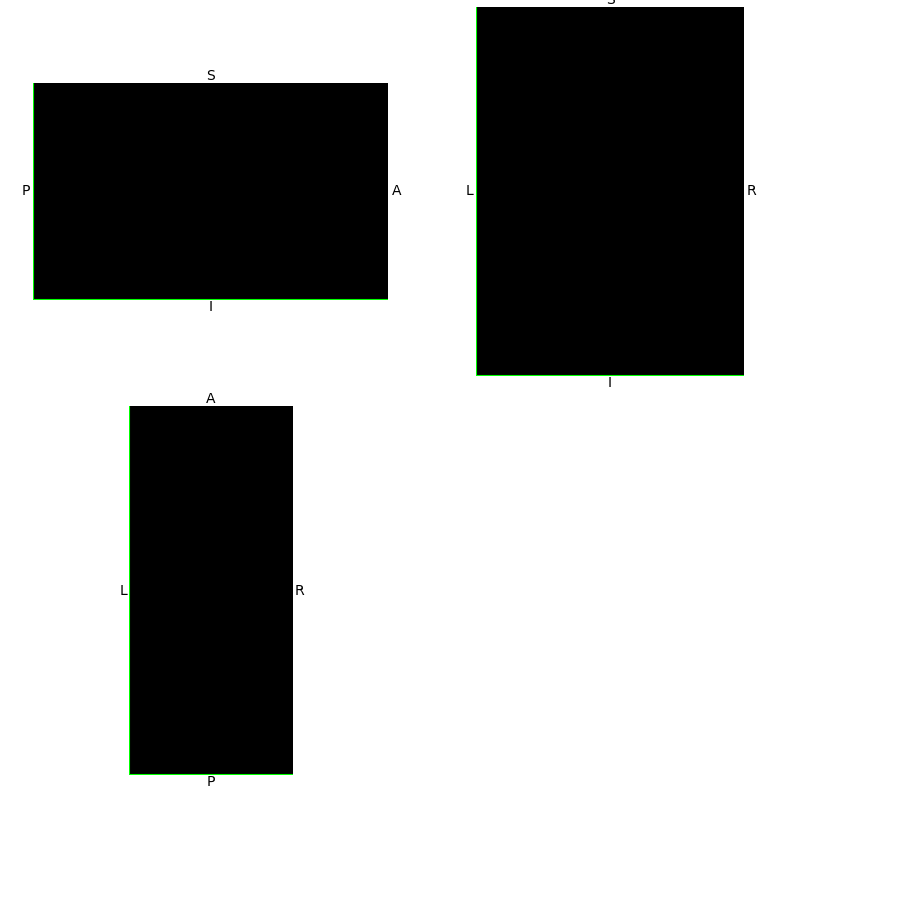

<OrthoSlicer3D: outsurfs/exvivo_closed_4.nii.gz (196, 441, 269)>

In [48]:
%matplotlib notebook
volume_data_4.orthoview()

<IPython.core.display.Javascript object>


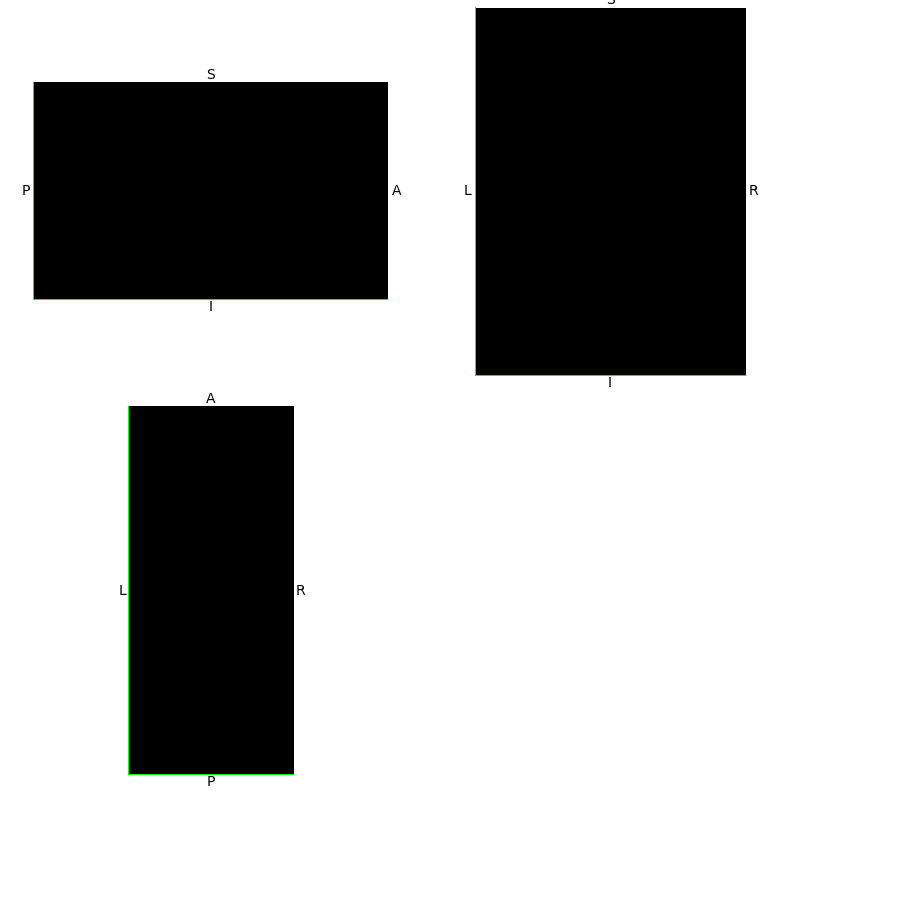

<OrthoSlicer3D: outsurfs/exvivo_closed_5.nii.gz (161, 357, 219)>

In [49]:
%matplotlib notebook
volume_data_5.orthoview()

In [50]:
def mesh_volume(volume):
    # Generate the mesh using marching cubes
    verts, faces, _, _ = marching_cubes(volume)

    return verts, faces

In [51]:
# Load the volume data from a NIfTI file
volume3 = nib.load("outsurfs/exvivo_closed_3.nii.gz").get_fdata()
volume4 = nib.load("outsurfs/exvivo_closed_4.nii.gz").get_fdata()
volume5 = nib.load("outsurfs/exvivo_closed_5.nii.gz").get_fdata()

# Fill in the sulci of the brain
# filled_volume = fill_sulci(volume)

# Generate a mesh from the filled volume
vertices_filled, faces_filled = mesh_volume(volume3)
vertices_filled_2, faces_filled_2 = mesh_volume(volume4)
vertices_filled_3, faces_filled_3 = mesh_volume(volume5)

In [ ]:
mlab.triangular_mesh(vertices_filled[:, 0], vertices_filled[:, 1], vertices_filled[:, 2], faces_filled)
mlab.show()

In [ ]:
mlab.triangular_mesh(vertices_filled_2[:, 0], vertices_filled_2[:, 1], vertices_filled_2[:, 2], faces_filled_2)
mlab.show()

In [ ]:
mlab.triangular_mesh(vertices_filled_3[:, 0], vertices_filled_3[:, 1], vertices_filled_3[:, 2], faces_filled_3)
mlab.show()

In [ ]:
surface_mesh = mesh.Mesh(np.zeros(faces_filled.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces_filled):
    for j in range(3):
        surface_mesh.vectors[i][j] = vertices_filled[f[j], :]

surface_mesh.save('outsurfs/exvivo_surface_mesh_3.stl')

In [ ]:
surface_mesh_2 = mesh.Mesh(np.zeros(faces_filled_2.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces_filled_2):
    for j in range(3):
        surface_mesh_2.vectors[i][j] = vertices_filled_2[f[j], :]

surface_mesh_2.save('outsurfs/exvivo_surface_mesh_4.stl')

In [ ]:
surface_mesh_3 = mesh.Mesh(np.zeros(faces_filled_3.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces_filled_3):
    for j in range(3):
        surface_mesh_3.vectors[i][j] = vertices_filled_3[f[j], :]

surface_mesh_3.save('outsurfs/exvivo_surface_mesh_5.stl')

In [ ]:
!pip install libigl
!pip install --upgrade setuptools
!pip install git+https://github.com/skoch9/meshplot.git
!pip install plotly

In [ ]:
import igl # Read Triangular meshes
# Ploting libraries
import plotly.io as pio
pio.renderers.default = "sphinx_gallery"
import meshplot as mp # Visualization

In [ ]:
# # Load the remeshed obj
v1, f1 = igl.read_triangle_mesh('outsurfs/exvivo_surface_mesh_3.stl')

# Visualization Shading options
shading = {"flat":True, # Flat or smooth shading of triangles
           "wireframe":True, "wire_width": 0.05, "wire_color": "green", # Wireframe rendering
           "width": 600, "height": 600, # Size of the viewer canvas
           "antialias": True, # Antialising, might not work on all GPUs
           "scale": 2.0, # Scaling of the model
           "side": "DoubleSide", # FrontSide, BackSide or DoubleSide rendering of the triangles
           "background": "#ffffff", # Background color of the canvas
           "line_width": 1.5, "line_color": "yellow", # Line properties of overlay lines
           "bbox": False, # Enable plotting of bounding box
           "point_color": "red", "point_size": 0.01 # Point properties of overlay points
          }

# Visualization
p = mp.plot(v1,f1, return_plot= True, c=v1[:, 1], shading=shading)

In [ ]:
# # Load the remeshed obj
v2, f2 = igl.read_triangle_mesh('outsurfs/exvivo_surface_mesh_4.stl')

# Visualization Shading options
shading = {"flat":True, # Flat or smooth shading of triangles
           "wireframe":True, "wire_width": 0.05, "wire_color": "black", # Wireframe rendering
           "width": 600, "height": 600, # Size of the viewer canvas
           "antialias": True, # Antialising, might not work on all GPUs
           "scale": 2.0, # Scaling of the model
           "side": "DoubleSide", # FrontSide, BackSide or DoubleSide rendering of the triangles
           "background": "#ffffff", # Background color of the canvas
           "line_width": 1.5, "line_color": "black", # Line properties of overlay lines
           "bbox": False, # Enable plotting of bounding box
           "point_color": "red", "point_size": 0.01 # Point properties of overlay points
          }

# Visualization
p = mp.plot(v2,f2, return_plot= True, c=v2[:, 1], shading=shading)

In [ ]:
# # Load the remeshed obj
v3, f3 = igl.read_triangle_mesh('outsurfs/exvivo_surface_mesh_5.stl')

# Visualization Shading options
shading = {"flat":True, # Flat or smooth shading of triangles
           "wireframe":True, "wire_width": 0.05, "wire_color": "black", # Wireframe rendering
           "width": 600, "height": 600, # Size of the viewer canvas
           "antialias": True, # Antialising, might not work on all GPUs
           "scale": 2.0, # Scaling of the model
           "side": "DoubleSide", # FrontSide, BackSide or DoubleSide rendering of the triangles
           "background": "#ffffff", # Background color of the canvas
           "line_width": 1.5, "line_color": "black", # Line properties of overlay lines
           "bbox": False, # Enable plotting of bounding box
           "point_color": "red", "point_size": 0.01 # Point properties of overlay points
          }

# Visualization
p = mp.plot(v3,f3, return_plot= True, c=v2[:, 1], shading=shading)

In [ ]:
surface_mesh = mesh.Mesh.from_file('outsurfs/invivo_surface_mesh_3.stl')

In [ ]:
fig = plt.figure()
ax = mplot3d.Axes3D(fig)

ax.add_collection3d(mplot3d.art3d.Poly3DCollection(surface_mesh.vectors))

# scale = surface_mesh.points.flatten(-1)
# ax.auto_scale_xyz(scale, scale, scale)

plt.show()

In [ ]:
surface_mesh_2 = mesh.Mesh.from_file('outsurfs/invivo_surface_mesh_4.stl')

In [ ]:
fig = plt.figure()
ax = mplot3d.Axes3D(fig)

ax.add_collection3d(mplot3d.art3d.Poly3DCollection(surface_mesh_2.vectors))

scale = surface_mesh.points.flatten(-1)
ax.auto_scale_xyz(scale, scale, scale)

plt.show()

In [ ]:
surface_mesh_3 = mesh.Mesh.from_file('outsurfs/invivo_surface_mesh_5.stl')

In [ ]:
fig = plt.figure()
ax = mplot3d.Axes3D(fig)

ax.add_collection3d(mplot3d.art3d.Poly3DCollection(surface_mesh_3.vectors))

scale = surface_mesh.points.flatten(-1)
ax.auto_scale_xyz(scale, scale, scale)

plt.show()